In [1]:
# import the libraries
import numpy as np
import pandas as pd
from sklearn import metrics
import matplotlib.pyplot as plt

from keras.models import Sequential
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import Dropout
from keras.regularizers import l2, l2

# loading the various images

In [2]:
path = ' /Users/asus/Desktop/new work/deep learnong and tensorflow/projet/projet 3/data/train'
path1 = ' /Users/asus/Desktop/new work/deep learnong and tensorflow/projet/projet 3/data/test'

In [3]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

In [4]:
training_set = train_datagen.flow_from_directory('/Users/asus/Desktop/new work/deep learnong and tensorflow/projet/projet 3/data/train',
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

Found 40 images belonging to 2 classes.


In [5]:
training_set

In [6]:
test_datagen = ImageDataGenerator(rescale = 1./255)

In [7]:
test_set = test_datagen.flow_from_directory('/Users/asus/Desktop/new work/deep learnong and tensorflow/projet/projet 3/data/test',
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'binary')

Found 20 images belonging to 2 classes.


import matplotlib.pyplot as plt
%matplotlib inline
#plot the first image in the dataset
image=training_set[1]
plt.imshow(image)
plt.show()

# building the classifier

In [8]:
Model = Sequential()

In [9]:
# Convolutional layer 1 with 32 filters of kernel size[5,5] 
Model.add(Convolution2D(32, 5, 5, input_shape = (64, 64, 3), activation = 'relu', kernel_regularizer=l2(0.1)))


In [10]:
# Pooling layer 1 with pool size[2,2] and stride 2 
Model.add(MaxPooling2D(pool_size = (2, 2), strides = 2, ))

In [11]:
#Convolutional layer 2 with 64 filters of kernel size[5,5] 
Model.add(Convolution2D(64, 5, 5, activation = 'relu', kernel_regularizer=l2(0.1)))

In [12]:
# Pooling layer 2 with pool size[2,2] and stride 2 
Model.add(MaxPooling2D(pool_size = (2, 2), strides =2, padding = 'same'))

In [13]:
# Flattening
Model.add(Flatten())

In [14]:
#Dense layer whose output size is fixed in the hyper parameter: fc_size=32 
Model.add(Dense( 32, activation = 'relu', kernel_regularizer=l2(0.1)))


In [15]:
#Dropout layer with dropout probability 0.4 
Model.add(Dropout(0.4))

In [16]:
Model.add(Dense(1, activation = 'sigmoid'))

In [17]:
Model.compile(optimizer = 'SGD', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [18]:
Model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 12, 12, 32)        2432      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 6, 6, 32)         0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 1, 1, 64)          51264     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 1, 1, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 64)                0         
                                                                 
 dense (Dense)               (None, 32)                2

In [29]:
history = Model.fit(training_set, epochs=10, batch_size=300,validation_data=test_set, verbose=True)

Epoch 1/10
2/2 [==============================] - 0s 208ms/step - loss: 8.1680 - accuracy: 0.6000 - val_loss: 8.1195 - val_accuracy: 0.6000
Epoch 2/10
2/2 [==============================] - 0s 153ms/step - loss: 8.1124 - accuracy: 0.5500 - val_loss: 8.0608 - val_accuracy: 0.5500
Epoch 3/10
2/2 [==============================] - 0s 252ms/step - loss: 8.0370 - accuracy: 0.4750 - val_loss: 8.0022 - val_accuracy: 0.6000
Epoch 4/10
2/2 [==============================] - 0s 254ms/step - loss: 7.9849 - accuracy: 0.4250 - val_loss: 7.9437 - val_accuracy: 0.5000
Epoch 5/10
2/2 [==============================] - 0s 257ms/step - loss: 7.9220 - accuracy: 0.5750 - val_loss: 7.8856 - val_accuracy: 0.5500
Epoch 6/10
2/2 [==============================] - 0s 143ms/step - loss: 7.8833 - accuracy: 0.5000 - val_loss: 7.8278 - val_accuracy: 0.6000
Epoch 7/10
2/2 [==============================] - 0s 146ms/step - loss: 7.8346 - accuracy: 0.4750 - val_loss: 7.7709 - val_accuracy: 0.6500
Epoch 8/10
2/2 [====

In [20]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

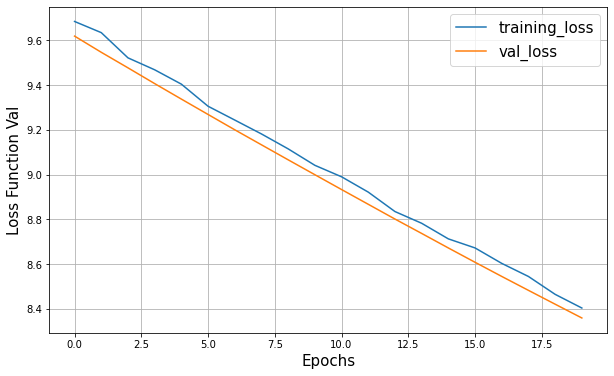

In [21]:
plt.figure(figsize=(10,6))
plt.plot(history.epoch, history.history['loss'])
plt.plot(history.epoch, history.history['val_loss'])
plt.legend(['training_loss', 'val_loss'], fontsize=15)

plt.xlabel('Epochs', fontsize=15)
plt.ylabel('Loss Function Val', fontsize=15)
plt.grid('on')
plt.show()

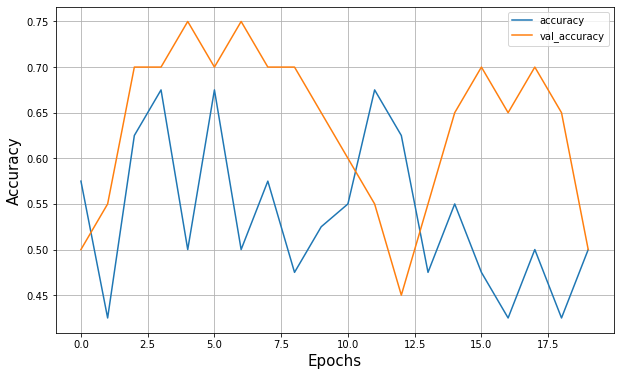

In [22]:
plt.figure(figsize=(10,6))
plt.plot(history.epoch, history.history['accuracy'])
plt.plot(history.epoch, history.history['val_accuracy'])
plt.legend(['accuracy', 'val_accuracy'])
plt.grid('on')
plt.xlabel('Epochs', fontsize=15)
plt.ylabel('Accuracy', fontsize=15)
plt.show()